# Imports

In [23]:
from argparse import Namespace
from collections import Counter
from pathlib import Path
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.optim as opt
from torch import nn
from torch.utils.data import DataLoader, Dataset

In [2]:
%reload_ext autoreload
%autoreload 2

# Load Data

In [4]:
PATH = Path('../data/yelp/')
!ls {PATH}

raw_test.csv                 reviews_with_splits_full.csv
raw_train.csv                reviews_with_splits_lite.csv


In [7]:
args = Namespace(
    review_csv = PATH / 'reviews_with_splits_lite.csv',
)

In [8]:
reviews_df = pd.read_csv(args.review_csv)
reviews_df.head()

,rating,review,split
0,negative,terrible place to work for i just heard a stor...,train
1,negative,"hours , minutes total time for an extremely s...",train
2,negative,my less than stellar review is for service . w...,train
3,negative,i m granting one star because there s no way t...,train
4,negative,the food here is mediocre at best . i went aft...,train


In [52]:
reviews_df.review.str.cat(sep=' ').split()

['terrible',
 'place',
 'to',
 'work',
 'for',
 'i',
 'just',
 'heard',
 'a',
 'story',
 'of',
 'them',
 'find',
 'a',
 'girl',
 'over',
 'her',
 'biological',
 'father',
 'coming',
 'in',
 'there',
 'who',
 'she',
 'hadn',
 't',
 'seen',
 'in',
 'years',
 'she',
 'said',
 'hi',
 'to',
 'him',
 'which',
 'upset',
 'his',
 'wife',
 'and',
 'they',
 'left',
 'she',
 'finished',
 'the',
 'rest',
 'of',
 'her',
 'day',
 'working',
 'fine',
 'the',
 'next',
 'day',
 'when',
 'she',
 'went',
 'into',
 'work',
 'they',
 'fired',
 'over',
 'that',
 'situation',
 '.',
 'i',
 'for',
 'one',
 'and',
 'boycotting',
 'texas',
 'roadhouse',
 'because',
 'any',
 'place',
 'that',
 'could',
 'be',
 'that',
 'cruel',
 'to',
 'their',
 'staff',
 'does',
 'not',
 'deserve',
 'my',
 'business',
 '.',
 '.',
 '.',
 'yelp',
 'wants',
 'me',
 'to',
 'give',
 'them',
 'a',
 'star',
 'but',
 'i',
 'don',
 't',
 'believe',
 'they',
 'deserve',
 'it',
 'hours',
 ',',
 'minutes',
 'total',
 'time',
 'for',
 'an',


In [56]:
reviews_length = reviews_df.review.apply(lambda x: len(x.split()))

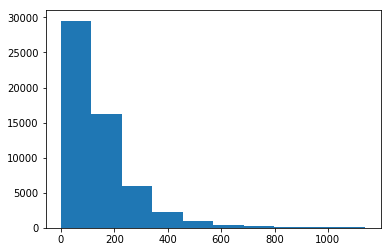

In [58]:
plt.hist(reviews_length);

In [32]:
tokens = reviews_df.review.str.cat(sep=' ').split()
tokens[:10]

['terrible', 'place', 'to', 'work', 'for', 'i', 'just', 'heard', 'a', 'story']

In [30]:
reviews_df.review.str.contains('.,?!').any()

True

In [65]:
c = Counter(reviews)
dir(c)

['__add__',
 '__and__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__init__',
 '__init_subclass__',
 '__ior__',
 '__isub__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__missing__',
 '__module__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '_keep_positive',
 'clear',
 'copy',
 'elements',
 'fromkeys',
 'get',
 'items',
 'keys',
 'most_common',
 'pop',
 'popitem',
 'setdefault',
 'subtract',
 'update',
 'values']

In [ ]:
c = dict

In [75]:
l = list(range(10))

In [77]:
l[-5:]

[5, 6, 7, 8, 9]

In [78]:
l[:30]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [74]:
len([token for token, count in c.items() if count > 100])

4039

In [40]:
tokens_counter = sorted(
    
    .items(), key=lambda x: x[1], reverse=True)
tokens_counter

[('.', 528735),
 ('the', 339990),
 (',', 257289),
 ('and', 231288),
 ('i', 225732),
 ('to', 185031),
 ('a', 179478),
 ('was', 117940),
 ('it', 106288),
 ('of', 103076),
 ('for', 83622),
 ('in', 82762),
 ('is', 82250),
 ('n', 75090),
 ('that', 73885),
 ('my', 70406),
 ('!', 69968),
 ('they', 61324),
 ('this', 58229),
 ('you', 57180),
 ('with', 53761),
 ('t', 52863),
 ('but', 52479),
 ('we', 51710),
 ('on', 49831),
 ('have', 49296),
 ('not', 48754),
 ('s', 45991),
 ('had', 41365),
 ('at', 39255),
 ('so', 35303),
 ('are', 34139),
 ('me', 33923),
 ('were', 32865),
 ('be', 32217),
 ('there', 31720),
 ('food', 30922),
 ('place', 30625),
 ('good', 28302),
 ('as', 27518),
 ('out', 26042),
 ('like', 25130),
 ('if', 25067),
 ('just', 24369),
 ('all', 24160),
 ('here', 23843),
 ('get', 23051),
 ('one', 22778),
 ('very', 22231),
 ('when', 21907),
 ('time', 21566),
 ('up', 21119),
 ('or', 20951),
 ('our', 20666),
 ('from', 20632),
 ('would', 20499),
 ('service', 20286),
 ('great', 19872),
 ('their'

In [51]:
len([token for token, count in tokens_counter if count > 10])

14124

In [41]:
len(tokens_counter)

61848

# Setup

## Reviews Dataset Class

In [10]:
class ReviewsDataset:
    def __init__(self, review_df, vectorizer):
        '''
        Parameters
        ----------
        review_df : pandas.DataFrame
            reviews dataset.
        vectorizer : ReviewsVectorizer
            vectorizer instantiated from the reviews dataset.
        '''
        self.review_df = review_df
        self._vectorizer = vectorizer
        
        # Split the dataset into train, val, and test datasets
        self.train_df = self.review_df[self.review_df.split == 'train']
        self.train_size = len(self.train_df)
        self.val_df = self.review_df[self.review_df.split == 'val']
        self.val_size = len(self.val_df)
        self.test_df = self.review_df[self.review_df.split == 'test']
        self.test_size = len(self.test_df)
        
        self._lookup_dict = {
            'train': (self.train_df, self.train_size),
            'val': (self.val_df, self.val_size),
            'test': (self.test_df, self.test_size)
        }
        
        self.set_split('train')
    
    @classmethod
    def load_dataset_and_make_vectorizer(cls, filename):
        '''
        Load dataset and make a new vectorizer from scratch.

        Parameters
        ----------
        filename : Union[str, Path]
            file path of the dataset.
        
        Returns
        -------
        ReviewsDataset : DataSet
            instance of reviews PyTorch Dataset.
        '''
        review_df = pd.read_csv(filename)
        vectorizer = ReviewsVectorizer.from_df(review_df)
        return cls(review_df, vectorizer)
    
    def get_vectorizer(self):
        return self._vectorizer
    
    def set_split(self, split='train'):
        '''
        Selects the split in the dataset based on a column in the dataframe.
        
        Parameters
        ----------
        split : str
            one in ['train', 'val', 'test']
        '''
        self._target_split = split
        self._target_df, self._target_size = self._lookup_dict[split]
    
    def __len__(self):
        return len(self._target_size)
    
    def __getitem__(self, index):
        '''
        Get a data point (review, rating) from the dataset.
        
        Parameters
        ----------
        index : int
            index of the data point.

        Returns
        -------
        data_point : dict
            dictionary of data point's review (features) and rating (target).
        '''
        row = self._target_df.iloc[index]
        review_vector = self._vectorizer.vectorize(row.review)
        rating = self._vectorizer.rating_vocab.lookup_token(row.rating)
        
        return {'x_data': review, 'target': rating}
        
    def get_num_batches(self, batch_size):
        '''
        Get the number of batches in the dataset.
        
        Parameters
        ----------
        batch_size : int
            batch size.
        
        Returns
        -------
        num_batches : int
            number of batches.
        '''
        return len(self) // batch_size

## Reviews Vocabulary

In [17]:
class Vocabulary:
    '''Class to process text and extract vocabulary for mapping.'''
    
    def __init__(self, token_to_idx=None, add_unk=True, unk_token='<UNK>'):
        '''
        Parameters
        ----------
        token_to_idx : dict
            dictionary of existing mapping to indices.
        add_unk : bool
            whether to add UNK token.
        unk_token : str
            unknown token to add to the vocabulary.
        '''
        if not token_to_idx:
            self._token_to_idx = {}
        else:
            self._token_to_idx = token_to_idx
        
        self._idx_to_token = {idx: token for token, idx in self._token_to_idx.items()}
        
        self._add_unk = add_unk
        self._unk_token = unk_token
        
        if add_unk:
            self.unk_idx = self.add_token(unk_token)
        else:
            self.unk_idx = -1
    
    def to_serializable(self):
        '''Returns a dictionary that can be serialized.'''
        return {'token_to_idx': self._token_to_idx,
                'add_unk': self._add_unk,
                'unk_token': self._unk_token}
    
    @classmethod
    def from_serializable(cls, **contents):
        '''Instantiates a vocabulary from serialized dictionary.'''
        return cls(**contents)
    
    def add_token(self, token):
        '''
        Update mapping dictionaries based on the token.
        
        Parameters
        ----------
        token : str
            item to be added to the vocabulary.
        
        Returns
        -------
        index : int
            index of the token.
        '''
        if token in self._token_to_idx:
            return self._token_to_idx[token]
        index = len(self._token_to_idx)
        self._token_to_idx[token] = index
        self._idx_to_token[index] = token
        return index
    
    def lookup_token(self, token):
        '''
        Get the index of the token from the vocabulary; otherwise, returns the
        index of the UNK token.
        
        Parameters
        ----------
        token : str
            token to lookup.
        
        Returns
        -------
        index : int
            index of the token.
        '''
        if self.add_token:
            return self._token_to_idx.get(token, self.unk_idx)
        return self._token_to_idx[token]
    
    def lookup_index(self, index):
        '''
        Get the token of the index from the vocabulary.
        
        Parameters
        ----------
        index : int
            index of the token.
        
        Returns
        -------
        token : str
            token to lookup.
        '''
        if index not in self._idx_to_token:
            raise KeyError(f'the index {index} is not in the Vocabulary.')
        
        return self._idx_to_token[index]

    def __str__(self):
        return f'<Vocabulary(size={len(self)})>'
    
    def __len__(self):
        return len(self._token_to_idx)

## Reviews Vectorizer

In [26]:
class ReviewsVectorizer:
    def __init__(self, review_vocab, rating_vocab):
        '''
        Parameters
        ----------
        review_vocab : Vocabulary
            map words to integers
        rating_vocab : Vocabulary
            map class labels to integers
        '''
        self.review_vocab = review_vocab
        self.rating_vocab = rating_vocab
    
    def vectorize(self, review):
        '''
        Creates one-hot vector for the review
        '''
        

    def from_serializable(self, **contents):
        pass

    def to_serializable(self):
        pass